In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

path = '/Volumes/Storage/0.SAGAbackup/ARData/'

dflog = pd.read_csv(path+'eachrows_logs.tsv', 
                 sep='\t', names=['action','note','timestamp','tool','userid'])
dfuser = pd.read_csv(path + 'useranswer.csv', header=0)

np.random.seed(0)
dfuser = dfuser.reindex(np.random.permutation(dfuser.index))
dfuser.reset_index(inplace=True, drop=True)

#get max column 
#dflog2 = dflog.drop(columns=['timestamp','userid'])
#dflog2 = pd.get_dummies(dflog2, drop_first=True)
#dflog2.to_csv(path + 'al_all_cols.csv')
dfallcolumns = pd.read_csv(path + 'get_dummies_all_header.txt', nrows=1)

#free defined max # of a user log. 3714 from rnumoflogsperusr.txt
maxn = 3714
#56 from len(dfallcolumns.columns.values)
maxcol = 56

#for fast comparision, get userid column as np 
nplog_userid = np.array(dflog['userid'].values)
# list var for indices of logs of the userid
idx_auser = []
# dataframe for a user 
dfauserlog = pd.DataFrame()
# Dataset for Keras model
X = []
# dummy var
cnt =0
#start loop with userid in lable dataset


In [8]:
rowcnt=0
for index, row in dfuser.iterrows():
    if row['SubmitYN'] == 0:
        continue
    userid=row['UserId']
    #get indices of logs of the userid as list,you should put [0]
    idx_auser = np.where(nplog_userid ==userid)[0]
    
  
    
    size+=idx_auser.size
    #get 'action','tool' log columns of the user as pd 
    dfauserlog = dflog.ix[idx_auser, ['action','tool']]
    #action/tool are categorical value 
    dfauserlog = pd.get_dummies(dfauserlog, drop_first=True)

    #fit to max col dataframe
    pdmaxcol = pd.DataFrame(columns=dfallcolumns.columns.values)
    #pdmaxcol = pdmaxcol.append(dfauserlog, ignore_index=True, sort=False)
    pdmaxcol = pdmaxcol.append(dfauserlog, ignore_index=True)

    pdmaxcol = pdmaxcol.fillna(0)

    #convert to np
    npnewlog = pdmaxcol.values
    
    #padding max rows
    if maxn> len(idx_auser): 
        b = np.zeros([maxn-len(idx_auser), maxcol])
        npnewlog = np.row_stack((npnewlog,b))
    X.append(npnewlog)

#finally, check X shape
print(np.array(X).shape)  


#Y = dataset.iloc[:,3].values

tyjpO2BetcZK3wd2PIJFP8ph0Zl2	504
RDeabBV5ufhBfPMc5iBUBvWeess1	2056
USlaDJ37psewnBXtCJ7Vkb7yhJK2	1198
T6xKJaE1gRXyVqkm7AGPfo2nj6z2	559
1PLWKE5tViX6az8ve6uzlLXHUx73	273
et7tes9XmEfsZtSdeTRSBf6f8Lp2	685
RqmMJiuyAZURXmzGBQK7XCzYsQa2	327
lQ48trglJxNuE7wtNvVet4IR4vK2	243
8ZrIxp2wqzUB84atw7lHOhj40hF2	300
eKF8wXii53eMPzhQh5Aq69PyCbG2	329
es8qFFK7SiSZl9Bzsbh1AMoyBy92	855
vTXqRJN8DHaG6a1KGO2iRrubTnw2	432
AA3CrVOWz0eps29L1k0eXMANkRe2	833
Dlc68iZCWRchmstCV03JDGeJjPu1	497
hS2PzCSp71S5oz7oG8Xx6okbT9I3	491
69ypobomxnbxbh0I5r1rNDphkTG2	36
HIoz6H2TGiVmfuBEDC1KGfANJyC2	866
BnFk74KWrbem5FJSSsYnuTenDwC2	790
X6OhXeK87IVZ3y5G0XKpPFtlDEv2	671
YWnGrvr2hAP1OXxW87IHJY05eaL2	347
5YcJoFn3ijY1V0p0mNYVXQMblKz2	1778
jOu9zAXxacOURh3qGKIzimDQKm92	834
m1wNR0DxOScVTckdY3lGY0Bdg7a2	1421
mD6ex2fXjZOvan1iuyvijRaYLjk1	726
dZidPuQVzgTWAaZ3CMvhgkjR9B33	375
TcikJ6CbUGU2yOCXnGDswAF9pwk2	906
9cz4o9inklSAUxYggOO3djsBjnB3	957
uynPsg45fjgebxrr1YaUqMsCv0I3	445
HnT9Fu3HtTa0u717H3DpA7c0jrv1	502
gMrfPVt8IqOaATEAuyGOxGx8DWk1	570
FFd7OX3

iwdRh4iEmKgPeYOXXoTD5URisuf2	417
jqVC2ChwFbbObHpGtk7cgQmLRlt2	909
5uI0hhKvVOXCJtIeoc8K7oKfvA03	1271
JN8WTp0PAkYSG9L1y6YmurkihI72	65
sykh8YklwMSTAlpkcxheGHlbNZm2	751
0nYfzXtfiNRSv9eSsEooklRB7BX2	389
knxYEcRvnscxc1fEUtIMxzt3MeZ2	945
Tn0mMkPCFCP5EKQ596cdzErXKID3	463
6SkTagCPLCYsEggpIZv00OXFp3m2	631
YX6ForpMVJd2Rh94M7RVx0PaioW2	994
ckLCX0FrXsS7hv3C7OeKNyoHcoi1	792
0KJhskQ22aVCvClIxmSIZqDGus53	2660
hvX1Eye9YmQk4uSXlApvdUByhXO2	820
CXmGuo2B1lYFGEyLMk8lMJeryqw1	636
VIqw2rJ59GOXrh1JPDsxhwe78TF2	333
XraQZfyqFpWtFKSo9cgBiVCYKzm1	251
SBgTg7uCtkRZUZdYSUVBtQlhkmm2	815
rYT33hQFX6Zn34TchG0IC3TEZ8N2	383
uYYL1pL84TUifRH0xPCmWtFkVBf1	916
xHQpKMtM5qWUrRQtwH5oY2udWYT2	639
WvjngeP655gJJcuR5XI3HN9r7l32	605
1tN82UtkEZMpVCyx0bnKvIDpLbF2	494
SlMzRYbN3gfgfVEluCiiY6ceCLs2	774
JySOWAcvBmZ8r0lgBbCQwYzhOeB2	507
Odzs7w9o17ZK5Xjm1HJPJn6AnyX2	756
9ZL4fRh0VEYfsSWMKdE6CXIgtoU2	491
dEcmcq9JaZVCPgFTmOnFJMd4D7i2	648
6TprwRgCTvM1epZa3a4bBzMYO893	500
n4SdOknklQhP6CIHUrCGeSNbgJJ3	1153
XmLtqWuf1AQS00rMiWRfikB3jUN2	833
UkmSm7e2

1QC1LbaCp3a0yS4QSpkJ7SLxQC82	1091
cE8lSyUq05gaiSFJKUXdwWhgaob2	999
pDDijGJX4eWi3kqlYZD1oB9c4ZZ2	457
mPACTOMoitTQf6SxYLW7gZwPFv52	522
5udU8us28BOn2a0h5tBwRjl7gLk2	418
s5Q3rarLnyMUTQfIfwCBguTgmbu2	686
Wdph7xFGZPdd1lED6VhDKbSUN7I2	419
pdWjMjgI65Vp7Tuq5I6Z0RpssCF3	449
kT88raIuKFcMYQDMVoGUoItwZce2	529
OZ0AmyM9rlSJdjPFeADmx9DuZQv1	243
6LJPmauvvxPuC7EtnwjEHN85Yw02	216
NSIDdTM2RuOMsYJ9u2qdWyV8h7Z2	191
n2usZgx4mLWILuQgGMHS1gdwMV82	54
dcY8DF5mfYb71yA40wtmHeRPMFW2	431
g5QGQbAo0IXkPGpmM4xg3uVZLnA2	439
8nakTJivjbd3KHMePN8J1i93vni1	519
9j3d7FBBGkR3TPJTjhMrOpI42YC2	550
uYQxKrVThKNllAKNywqBSaqXYto1	721
5kAOC1ZEwVQbflxkvpV8Ae6I6RA2	376
pk0Eio4bvrMPqkhbZ3c0MrRI6co1	1391
J2NEGnfuRoWXeY5YAgPKQayAgdO2	1214
jqLL8BbzmaNuaSjffTpIgnOI2O02	239
IuFe9qyJGgRl6LZ2bEsSEFVb4Sh2	280
gcubTRx4HUNQ8bPQXSmiA7R0aV03	1044
nfvEQB00q5cirg3TP5jZBYExkFD2	847
JMiLBhFJpGQGID7Hl8FTfxB3QPF3	2132
0abpfxfVOkgh3L2HoayVitxHqJe2	62
VvOEW4NxKnOG0aTnLGXTrzJWz5z2	111
3R6nyllwRgOYVbY5VLVev9DFhks1	5
7PmVhldWuvSgrppSUUhYK02kTTI3	963
VklRK5rZq

In [1]:
XX = np.array(X)
XX.shape

NameError: name 'np' is not defined

In [127]:
# get YNscore only for submitted case
#Y = dfuser[dfuser['SubmitYN']==1]['YNScore']
Y = dfuser[dfuser['SubmitYN']==1]
Y = Y.loc[:,['AkonaYN','EolaniYN','Jakala-TayYN','KaylidYN','SylcariYN','WroftYN']]
Y
#coding all score>0 cases to score=1 


,AkonaYN,EolaniYN,Jakala-TayYN,KaylidYN,SylcariYN,WroftYN
7,0,0,0,0,0,0
16,0,0,0,0,0,0
26,0,0,0,0,0,0
29,0,0,0,0,0,1
31,0,0,0,0,0,0
34,0,0,0,0,0,0
38,0,0,0,0,0,0
40,0,0,0,0,0,0
44,0,0,0,0,1,0
51,0,0,0,0,0,0


In [129]:
yy = pd.get_dummies(Y, drop_first=True)
yy

,AkonaYN,EolaniYN,Jakala-TayYN,KaylidYN,SylcariYN,WroftYN
7,0,0,0,0,0,0
16,0,0,0,0,0,0
26,0,0,0,0,0,0
29,0,0,0,0,0,1
31,0,0,0,0,0,0
34,0,0,0,0,0,0
38,0,0,0,0,0,0
40,0,0,0,0,0,0
44,0,0,0,0,1,0
51,0,0,0,0,0,0


In [130]:
YY = np.array(yy)
YY.shape

(535, 6)

In [131]:
from sklearn.model_selection import train_test_split
xtrain, xtest = train_test_split(XX, train_size=0.8)
ytrain, ytest = train_test_split(YY, train_size=0.8)

/Volumes/Storage/StorageApp/anaconda3/envs/Keras/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [132]:
xtrain = xtrain.reshape(-1,3714,56,1)
xtest = xtest.reshape(-1,3714,56,1)
np.save(path+'xtrain', xtrain)
np.save(path+'xtest', xtest)
np.save(path+'ytrain', ytrain)
np.save(path+'ytest', ytest)

In [ ]:
#code end
#code end



In [59]:
dfallcolumns = pd.read_csv(path + 'get_dummies_all_header.txt', nrows=1)
dfallcolumns

,action_Change Note Name to:,action_Click,action_Click Back Button,action_Click Destination Planet,action_Click Forward Button,action_Click Go,action_Click Instrument,action_Click Left Menu,action_Click Nav Menu,action_Click Planet,...,tool_Notebook,tool_Probe Design,tool_Tool Bar,tool_conceptDB,tool_missionControl,tool_missions-db,tool_periodic-table,tool_probeDesign,tool_solar-system-db,tool_spectra


In [72]:
Y = dfuser[dfuser['SubmitYN']==1]['YNScore']
Y

0       5
1       4
2       3
3       3
4       3
5       3
6       3
7       3
8       3
9       3
10      3
11      3
12      3
13      3
14      3
15      3
16      3
17      3
18      3
19      3
20      2
21      2
22      2
23      2
24      2
25      2
26      2
27      2
28      2
29      2
       ..
2442    0
2449    0
2457    0
2464    0
2480    0
2486    0
2487    0
2492    0
2493    0
2516    0
2521    0
2523    0
2528    0
2545    0
2552    0
2561    0
2562    0
2575    0
2576    0
2587    0
2593    0
2597    0
2601    0
2602    0
2604    0
2608    0
2612    0
2623    0
2674    0
2685    0
Name: YNScore, Length: 535, dtype: int64

TypeError: Image data cannot be converted to float

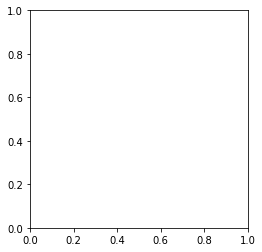

In [35]:
plt.imshow(Z[0], cmap='binary')

In [57]:
i = 0
for idx, l in enumerate(X):
    Z[idx,:,:] = l
    

ValueError: could not broadcast input array from shape (5250,56) into shape (5176,56)

In [28]:
Z[0]

array([[0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       ..., 
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0]], dtype=object)

In [62]:
dfauserlog = pd.get_dummies(dflog, drop_first=True)
dfauserlog.to_csv(path+'dfauserlog.txt', index=False)

In [61]:
dfauserlog.shape

(1381160, 56)

In [53]:
dflog['note'] = dflog['note'].apply(lambda x: re.sub(r"[^A-Za-z0-9]+", "",x))

In [54]:
dflog['note'].to_csv(path+'test.txt')

In [55]:
nplog = dflog.values


In [24]:
NP = np.empty((0,3), object)
NP = np.vstack((NP, nplog[0]))

In [42]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
nplog1 = le.fit_transform(nplog[:,1])


In [45]:
nplog

array([['Walking Through', 'ProbeDoor1', 'Gate'],
       ['Click', 'Show Tools', 'Tool Bar'],
       ['Click', 'Hide Tools', 'Tool Bar'],
       ..., 
       ['Click Left Menu', 'lander', 'missionControl'],
       ['Click Probe Button', 'Venus', 'missionControl'],
       ['Click Destination Planet', 'VENUS', 'missionControl']], dtype=object)

In [37]:
np.savetxt(path+'test.txt', nplog[:,1])

TypeError: Mismatch between array dtype ('object') and format specifier ('%.18e')

In [58]:
len(np.unique(nplog[:,1]))

9281

In [56]:
with open(path+'test2.txt', 'w') as f:
    for item in np.unique(nplog[:,1]):
        f.write("%s\n" % item)
f.close()

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
nplog1 = le.fit_transform(nplog)
ohe = OneHotEncoder(categorical_features=[0,1,2])
nplog2 = ohe.fit_transform(nplog1).toarray()